# Scrape Attorney Emails with Selenium and Beautiful Soup – Part 1
In this project I will demonstrate how to scrape the email addresses for California attorneys in a particular geographical area using the [California Bar Association (CalBar) website](https://www.calbar.ca.gov/). This is a multi-part project. In this first part, we'll extract the list of all zip codes for San Diego county from the CalBar website. They have a [demographics search feature](https://apps.calbar.ca.gov/members/demographics_search.aspx) that lists the number of attorneys for a particular county by zip code or city. We will use these zip codes in Part 2 to search for attorneys using CalBar's advanced search.

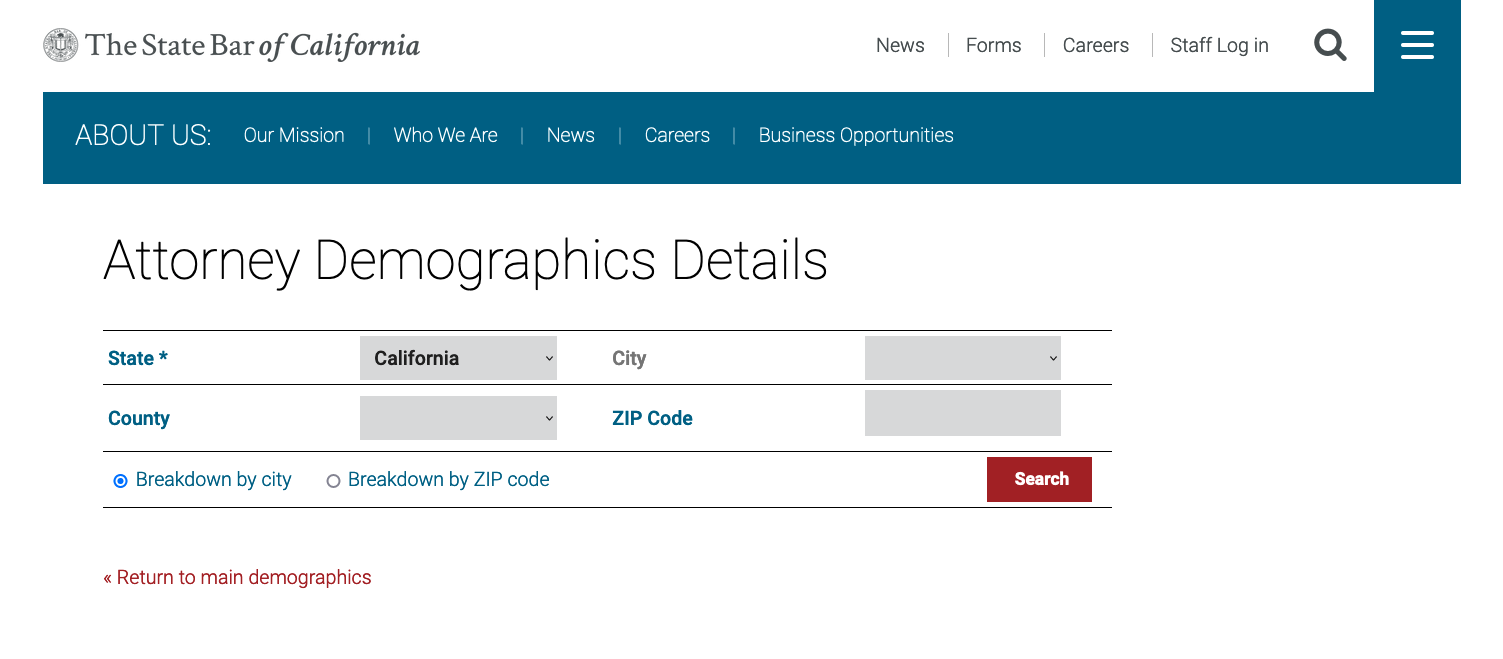

From this page, we'll extract all the zip codes to be used in Part 2 of this tutorial. We will select the **Breakdown by ZIP code** option and also **San Diego** from the **County** dropdown menu, as shown below. We need to get results by zip code rather than city because the CalBar search feature only lists a maximum of 500 results for each search. Searching by zip code will allow us to (mostly) stay under this 500 limit, unless there are more than 500 attorneys associated with a particular zip code. For these instances, we can make our search more specific by searching by last initial in addition to zip code, but we'll save those details for Part 2.

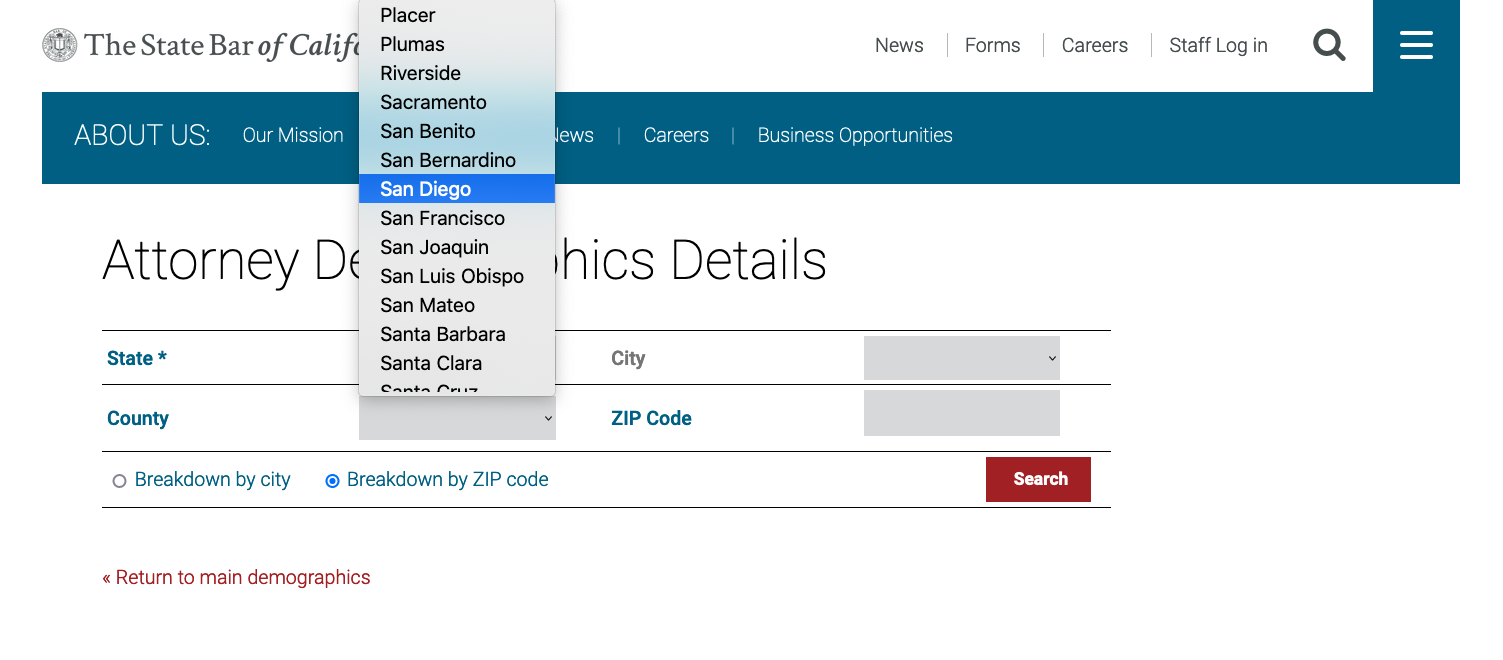

We need to inspect the **County** dropdown menu, the **Breakdown by ZIP code** element, and the **Search** button to see how we can manipulate these in Selenium. The **Breakdown by ZIP code** element is an `input` element with an `id` value of `rbZipCode`.

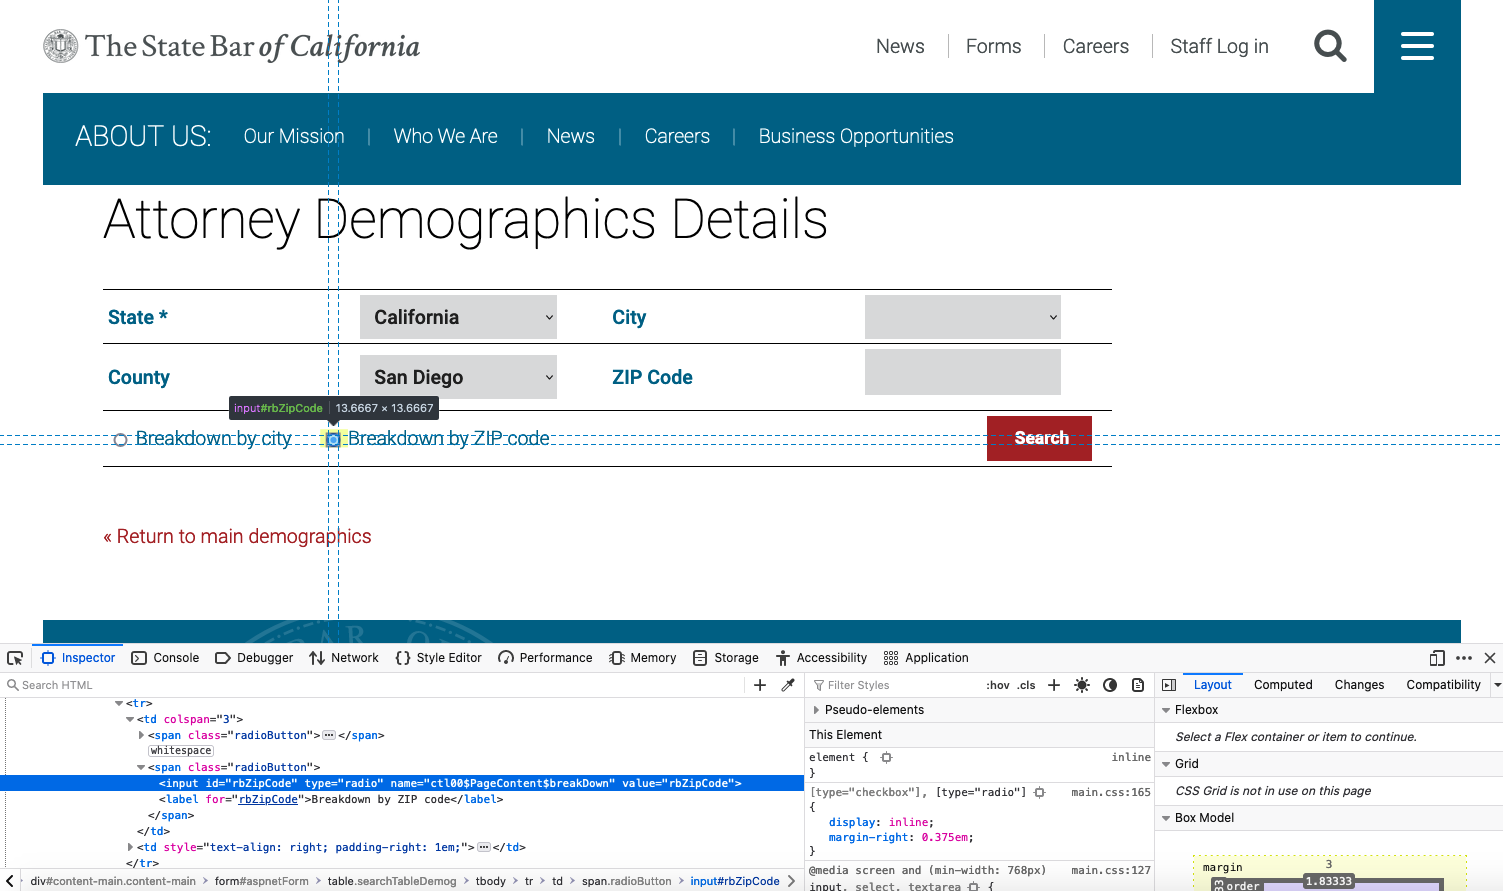

The **County** dropdown menu is a `select` element with an `id` value of `ddlCounty`.

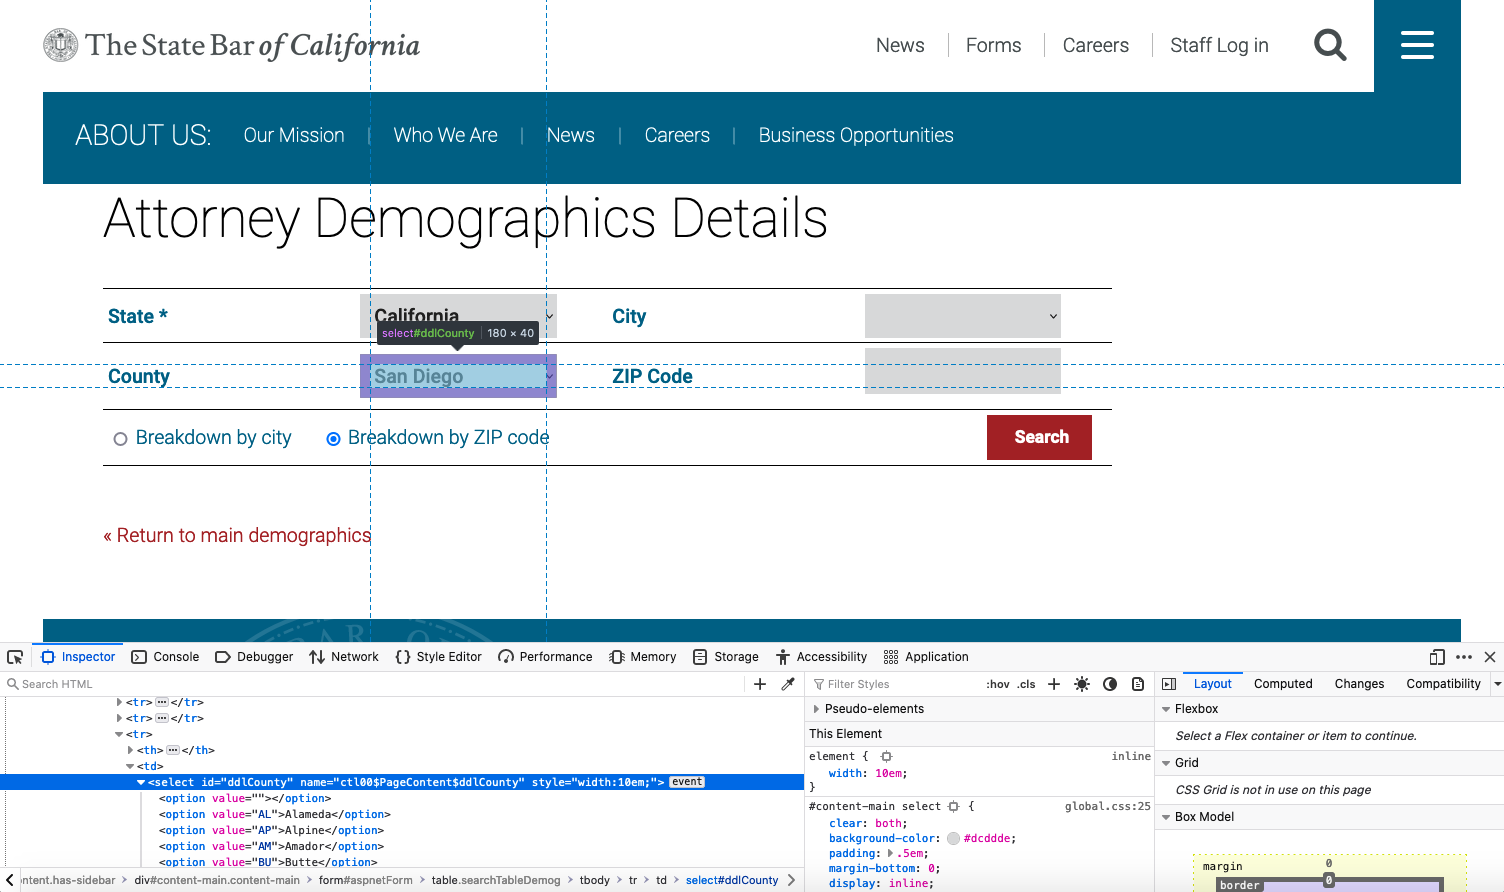

Lastly, the **Search** button is an `input` element with an `id` value of `btnSubmit`.

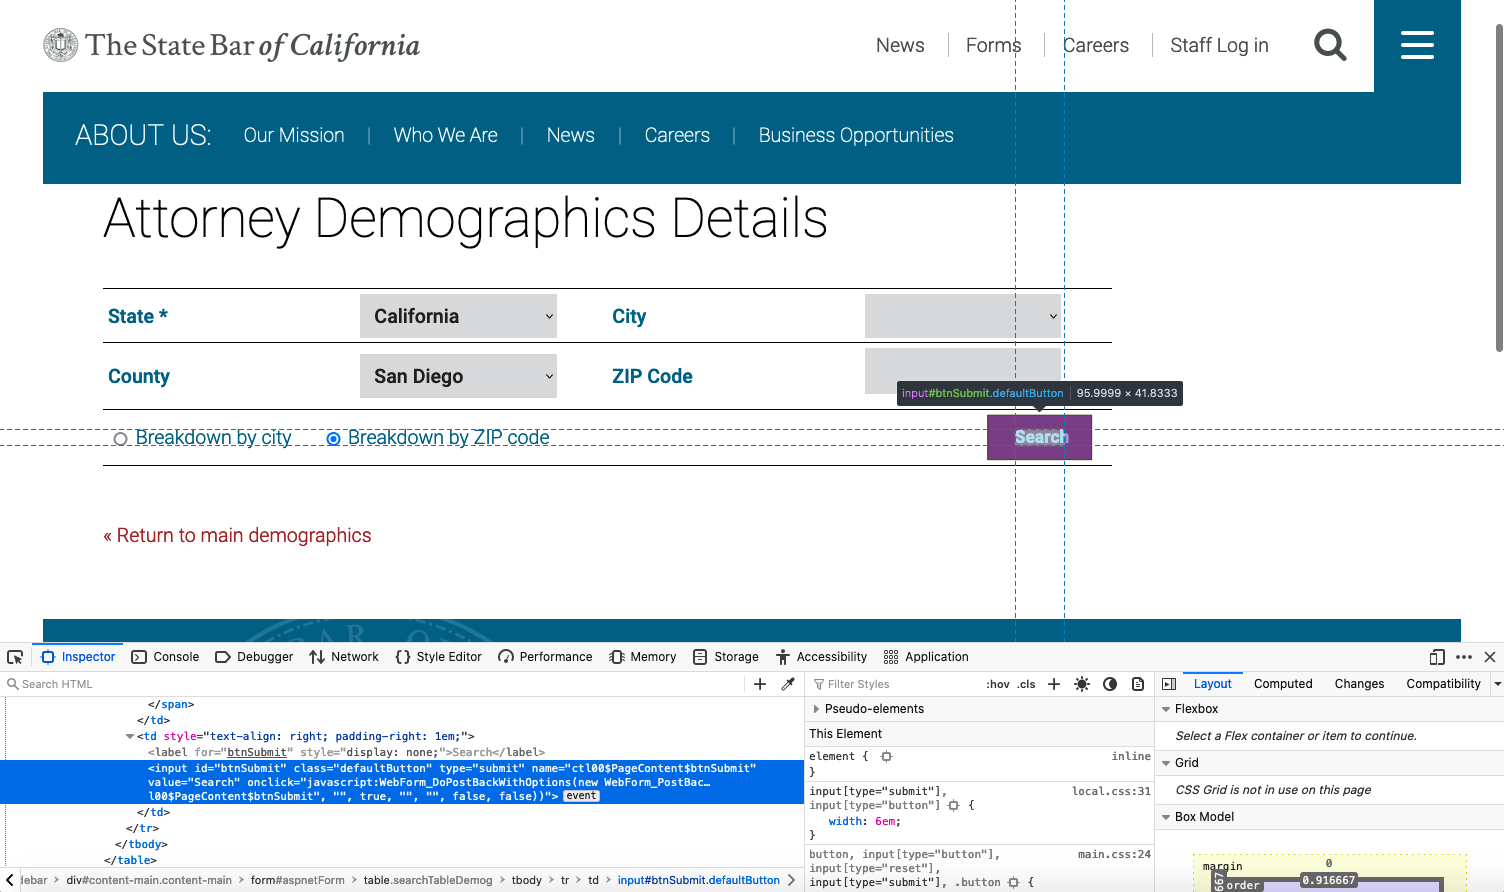

We can see what happens after manually selecting these options and running the search. The results page lists a table of all zip codes in San Diego county and the number of attorneys associated with each.

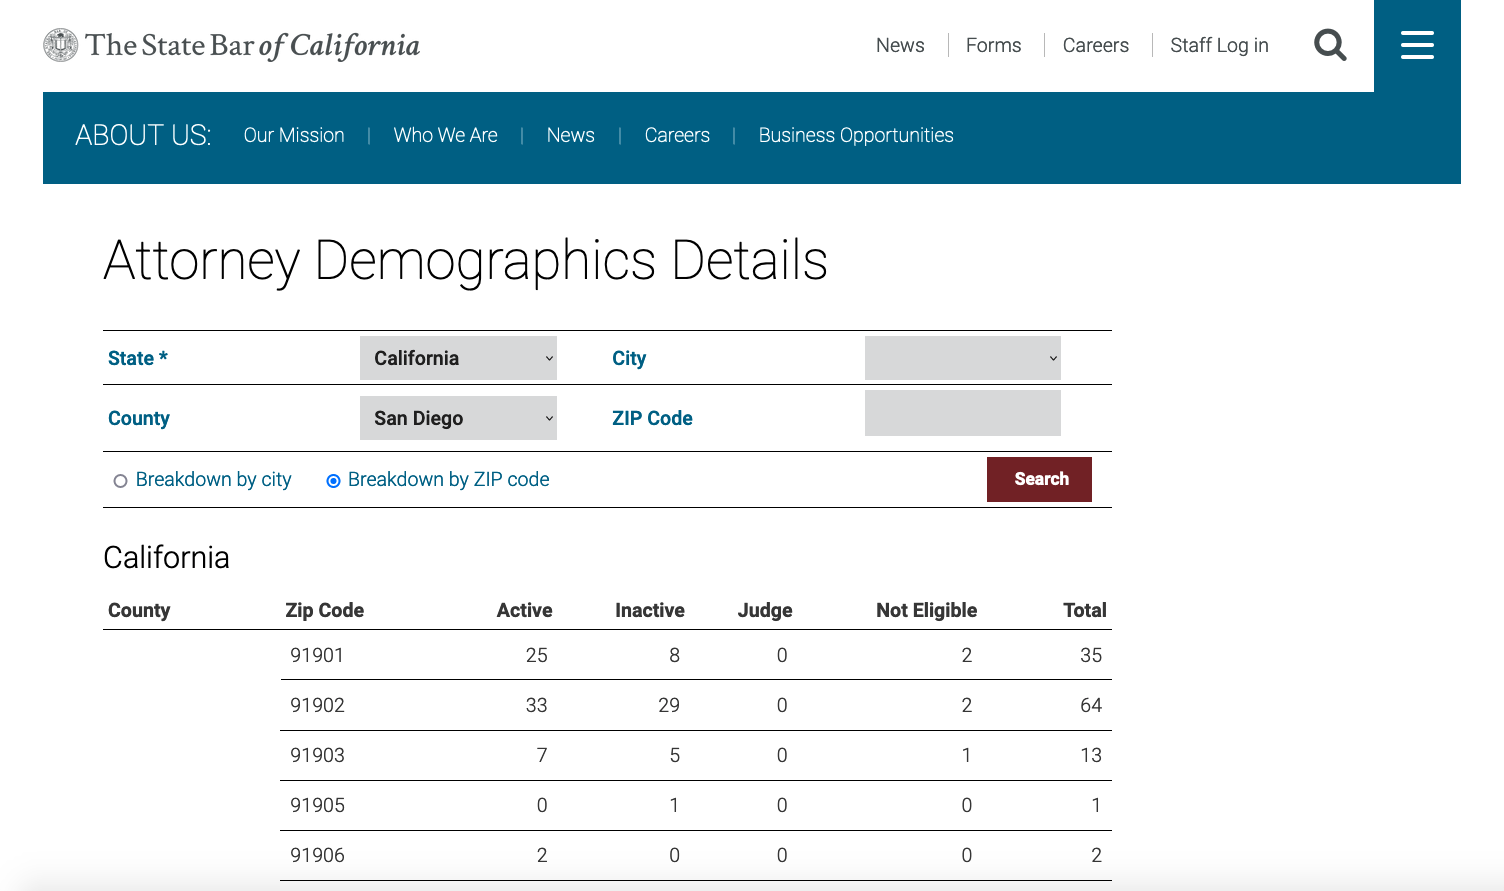

We can inspect the list of zip codes to see that they are indeed stored in a `table` element. Once we have loaded the dynamically-rendered HTML, we can simply extract this table using the pandas utility function `read_html` and then save it to a DataFrame.

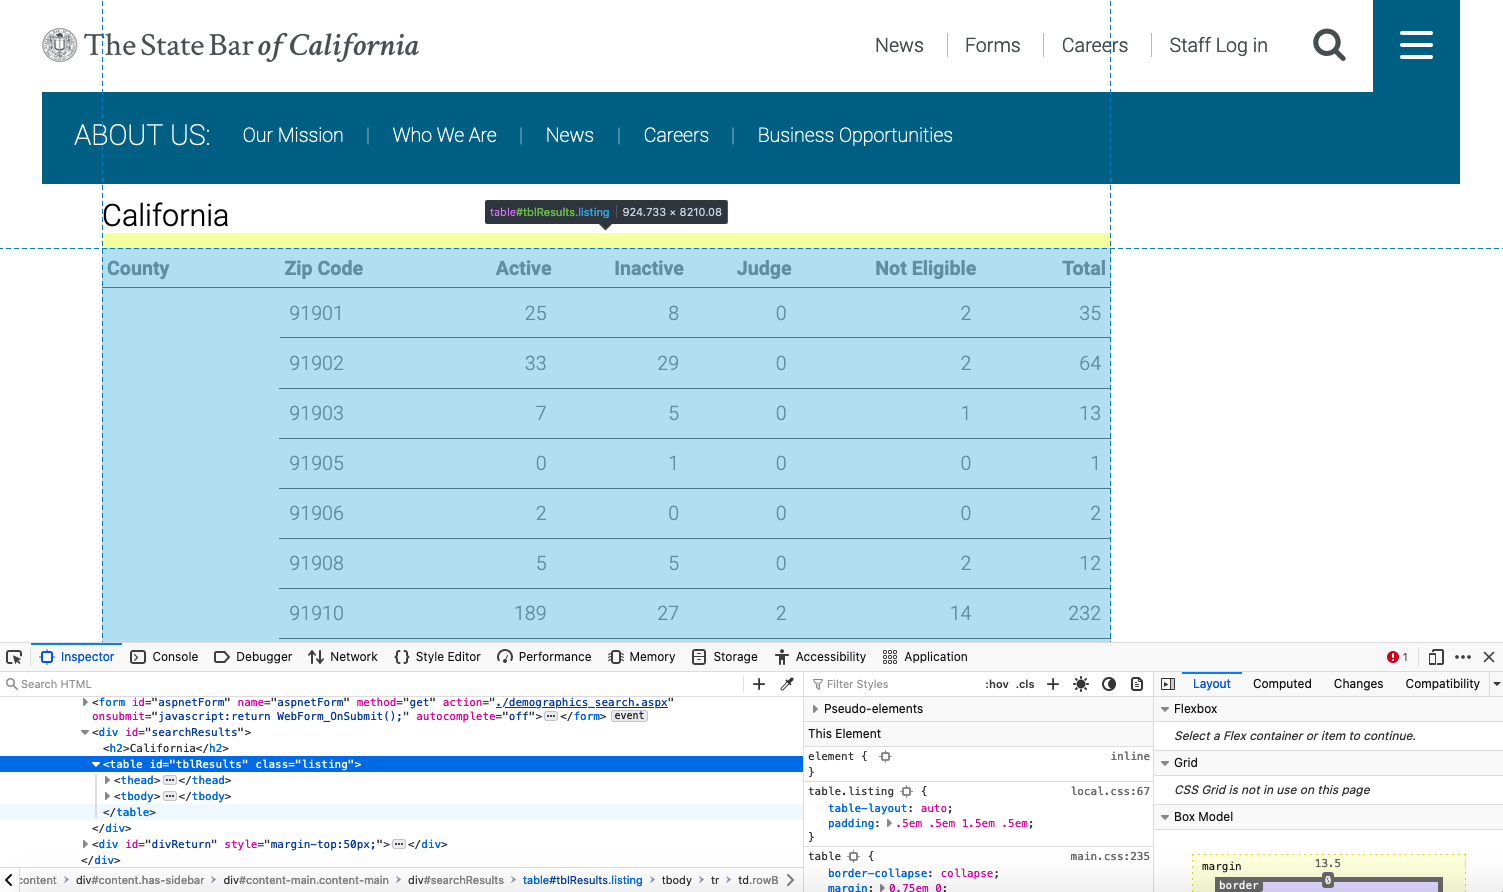

Let's import the required libraries and create a function to instantiate the driver. We'll use undetected-chromedriver, a special version of chromedriver with enhanced bypassing of anti-scraping measures, which you can install using the following command:

`pip install undetected-chromedriver`

Our function will instantiate the headless driver with a `user-agent` string.

In [7]:
import time
import pandas as pd
from fake_useragent import UserAgent
import undetected_chromedriver.v2 as uc
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC

# Function to instantiate undetected-chromedriver
def browser():
    # Get random user agent
    ua = UserAgent()
    user_agent = ua.random
    # Instantiate undetected-chromedriver with options
    options = uc.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument(f"user-agent={user_agent}")
    driver = uc.Chrome(options=options, use_subprocess=True)
    return driver

Now we can write a function to scrape the zip codes from CalBar. We'll declare our `driver` and sleep for five seconds to give the page time to load.

In [ ]:
def scrape_calbar_zipcodes():
    url = "https://apps.calbar.ca.gov/members/demographics_search.aspx"

    # Instantiate driver
    driver = browser()
    driver.get(url)
    time.sleep(5)
    
    # ...

Now we will select the option corresponding to San Diego county from the dropdown menu, which is "SD." To do this, we'll use the `driver.find_element()` function to locate the element by `id` and create a `Select` object from it. Selenium conveniently allows us to select options from dropdown menus using this `Select` class.

In [ ]:
def scrape_calbar_zipcodes():
    
    # ...
    
    # Select "San Diego" option value
    dropdown = Select(driver.find_element(By.ID, "ddlCounty"))
    time.sleep(1)
    dropdown.select_by_value("SD")
    time.sleep(1)
    
    # ...

We also need to select the "Breakdown by ZIP code" button. We can use the Selenium `click()` function to click on it.

In [ ]:
def scrape_calbar_zipcodes():
    
    # ...
    
    # Select "Breakdown by ZIP code"
    select_zip_code = driver.find_element(By.ID, "rbZipCode")
    select_zip_code.click()
    time.sleep(3)
    
    # ...

Finally, we'll click the "Search" button and sleep for 30 seconds, since the results take a while to load. This will allow Selenium to detect the results without throwing an "element not found" error.

In [ ]:
def scrape_calbar_zipcodes():
    
    # ...
    
    # Click the "Search" button and sleep for 30 seconds
    submit = driver.find_element(By.ID, "btnSubmit")
    submit.click()
    time.sleep(30)

    # ...

Last, but not least, we will use the pandas `read_html` function to load the tables from the results page. We can simply use `driver.page_source` as our argument to the `read_html` function. The table of zip codes is the second table in the list, corresponding to index 1. We'll save this table to a DataFrame and then output it to a CSV file.

In [ ]:
def scrape_calbar_zipcodes():
    
    # ...
    
    # Load tables from dynamically-generated HTML
    tables = pd.read_html(driver.page_source)
    df = tables[1]

    # Save to CSV file
    df.to_csv("zip-code-list-san-diego-county.csv")

    driver.quit()

Here is the full scraper function.

In [9]:
def scrape_calbar_zipcodes():
    url = "https://apps.calbar.ca.gov/members/demographics_search.aspx"
    
    # Instantiate driver
    driver = browser()
    driver.get(url)
    time.sleep(5)

    # Select "San Diego" option value
    dropdown = Select(driver.find_element(By.ID, "ddlCounty"))
    time.sleep(1)
    dropdown.select_by_value("SD")
    time.sleep(1)
    
    # Select "Breakdown by ZIP code"
    select_zip_code = driver.find_element(By.ID, "rbZipCode")
    select_zip_code.click()
    time.sleep(3)

    # Click the "Search" button and sleep for 30 seconds
    submit = driver.find_element(By.ID, "btnSubmit")
    submit.click()
    time.sleep(30)

    # Load tables from dynamically-generated HTML
    tables = pd.read_html(driver.page_source)
    df = tables[1]

    # Save to CSV file
    df.to_csv("zip-code-list-san-diego-county.csv", index=False)
        
    driver.quit()

    print("Scraping completed")

Now we can run our scraper function.

In [10]:
scrape_calbar_zipcodes()

Scraping completed


Let's load the CSV file to make sure we got our results.

In [12]:
df = pd.read_csv("zip-code-list-san-diego-county.csv")
df.head()

County Zip Code  Active  Inactive  Judge  Not Eligible  Total
0  San Diego    91901      25         8      0             2     35
1  San Diego    91902      33        29      0             2     64
2  San Diego    91903       7         5      0             1     13
3  San Diego    91905       0         1      0             0      1
4  San Diego    91906       2         0      0             0      2

In [13]:
df.tail()

County Zip Code  Active  Inactive  Judge  Not Eligible  Total
173  San Diego    92195       7         1      0             0      8
174  San Diego    92196       5         6      0             0     11
175  San Diego    92197       3         0      0             0      3
176  San Diego    92198      15         9      0             1     25
177  San Diego    Total   16393      4039    169           971  21572

Our results were successfully saved to the CSV file. We will use these results to build our next scraper in Part 2.